[10 minute pandas guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#min)

[pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

# Задание по pandas

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('tweets.csv')

In [ ]:
print(df)

               created_at  likes  retweets  \
0     2019-08-07 22:36:56   7566      1498   
1     2019-08-07 05:00:38  21886      5984   
2     2019-08-07 04:52:33   6462      1266   
3     2019-08-06 08:35:26    466        61   
4     2019-08-06 07:33:20   3971       906   
...                   ...    ...       ...   
31110 2018-12-20 05:28:36      3         1   
31111 2018-12-20 05:18:28      2         0   
31112 2018-12-19 09:50:56     31         4   
31113 2018-12-19 05:49:03      5         0   
31114 2018-12-18 05:59:09     31         6   

                                                   tweet time_of_day  \
0       Unresolved thoughts, prematurely pushed out o...     evening   
1       The modern mind is overstimulated and the mod...     morning   
2      \n\nThe longer you go without shipping product...       night   
3                   @orangebook_ This was a good tweet.      morning   
4       Social media lowers the cost of raising &amp;...     morning   
...            

In [ ]:
def tod_converter(timestamp):
    converter = {'morning': (5, 13),
                 'afternoon': (13, 16),
                 'evening': (16, 23)}
    
    hour = timestamp.hour
    
    for tod in converter:
        if hour in range(*converter[tod]):
            return tod
    return 'night'

df['created_at'] = pd.to_datetime(df['created_at'])
df['time_of_day'] = df['created_at'].apply(tod_converter)

`Задание 1`:

Выделить никнейм автора, содержащийся в колонке `tweet` **в самом начале** между знаками `@` и `:`, в отдельную колонку `handle` 

Содержание твитов в колонке `tweet` избавить от этого никнейма

Воспользуйтесь методом `.apply()` для создания `handle`, написав свою кастомную функцию

In [ ]:
import re

def parse_handle(tweet):
    handle = str((re.search(r'@(.*):', tweet)).group(1))
    return handle

def delete_nick(tweet):
    handle = str((re.search(r'@(.*):', tweet)).group(1))
    tweet = tweet.lstrip('@')
    tweet = tweet.lstrip(handle)
    tweet = tweet.lstrip(':')
    return tweet

df['handle'] = df['tweet'].apply(parse_handle)
df['tweet'] = df['tweet'].apply(delete_nick)

`Задание 2`:

Создайте колонку `num_mentions`, в которой посчитайте, сколько раз в каждом из твитов были упомянуты логины других пользователей (считаются только упоминания, начинающиеся с `@`)

Воспользуйтесь методом `.apply()` для этого, написав свою кастомную функцию

In [ ]:
def count_mentions(tweet):
    mentions = tweet.count('@')
    return mentions

df['num_mentions'] = df['tweet'].apply(count_mentions)



`Задание 3`:

Постройте столбчатую диаграмму распределения числа твитов по месяцам.

В какой месяц какого года было опубликовано больше всего твитов?

In [ ]:
df['month'] = pd.DatetimeIndex(df['created_at']).month
month_counts = df['month'].value_counts()
df_month_counts = pd.DataFrame(month_counts)

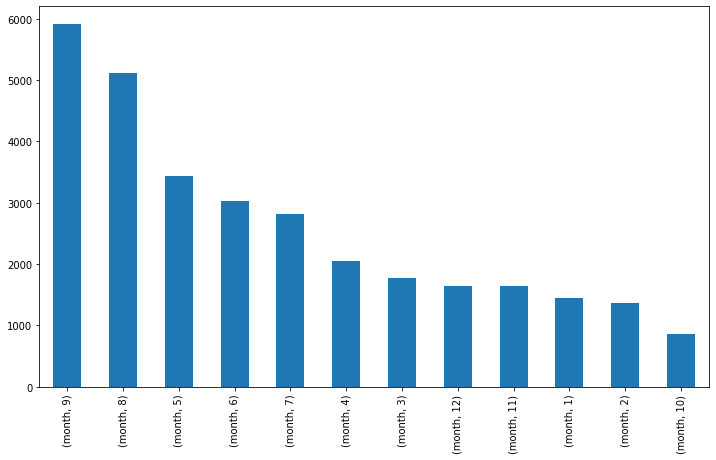

In [ ]:
df_month_counts.unstack().plot(kind='bar', stacked=True, figsize=(12, 7))

In [ ]:
max_month_list = df_month_counts.index[df_month_counts.month == df_month_counts.month.max()].tolist()
max_month = int(max_month_list[0])
max_month

9

In [ ]:
month_year_counts = df[df.month == max_month]
df_month_year_counts = pd.DataFrame(month_year_counts)

In [ ]:
df_month_year_counts['year'] = pd.DatetimeIndex(df_month_year_counts['created_at']).year
year_counts = df_month_year_counts['year'].value_counts()
df_year_counts = pd.DataFrame(year_counts)

In [ ]:
max_year_list = df_year_counts.index[df_year_counts.year == df_year_counts.year.max()].tolist()
max_year = int(max_year_list[0])
max_year

2019

In [ ]:
print(f'Больше всего твитов было опубликовано в {max_month} месяце {max_year} года')

Больше всего твитов было опубликовано в 9 месяце 2019 года


`Задание 3`:

Посчитайте соотношение ретвитов к лайкам, записав значение в колонку `rt_ratio`

Заполните случаи деления на ноль (`inf`) значениями  `0` с помощью метода `.replace()`


In [ ]:
df['rt'] = df['retweets'] / df['likes']

In [ ]:
def change_to_zero(ratio):
    if np.isinf(ratio):
      ratio = 0
    return ratio

df['rt'] = df['rt'].apply(change_to_zero)

`Задание 4`:

Выделите топ-5 популярных авторов (по среднему количеству лайков), количество твитов которых превышает `500`.
Среди этих твитов выделите только те, у которых больше 30 лайков.

Для подсчета твитов и усреднения лайков используйте `.groupby('author').agg({...})`

In [ ]:
number_of_tweets_df = pd.DataFrame(df['handle'].value_counts())
number_of_tweets_df = number_of_tweets_df.reset_index()
number_of_tweets_df = number_of_tweets_df.rename(columns={'index': 'handle', 'handle': 'amount'})
number_of_tweets_df = number_of_tweets_df[number_of_tweets_df['amount'] > 500]

In [ ]:
top_tweets = list(number_of_tweets_df['handle'])

In [ ]:
top_likes_df = df.groupby('handle').agg({'likes': 'mean'})
top_likes_df = top_likes_df.sort_values(by = 'likes', ascending = False)
top_likes_df = top_likes_df.reset_index()
top_likes_df = top_likes_df[top_likes_df.handle.isin(top_tweets)]

In [ ]:
top_handle = list(top_likes_df['handle'])

In [ ]:
top_df = df[df.handle.isin(top_handle)]
top_df = top_df[top_df['likes'] > 30]
top_df

,created_at,likes,retweets,tweet,time_of_day,handle,num_mentions,month,rt
1577,2019-09-20 21:47:49,55,17,Some statements are so incorrect that you sho...,evening,EdLatimore,0,9,0.309091
1579,2019-09-20 21:37:42,42,9,The best and worst things in life walk hand i...,evening,EdLatimore,0,9,0.214286
1584,2019-09-20 20:04:01,36,10,Intermittent Fasting allows you to lose fat s...,evening,EdLatimore,1,9,0.277778
1586,2019-09-20 19:34:02,120,28,"If you haven't accomplished anything, you don...",evening,EdLatimore,0,9,0.233333
1587,2019-09-20 19:31:35,70,9,Everyone wanna talk bad about crackheads unti...,evening,EdLatimore,0,9,0.128571
...,...,...,...,...,...,...,...,...,...
31100,2018-12-25 15:04:17,52,11,People like to live in illusions because livi...,afternoon,uncannyinsights,0,12,0.211538
31103,2018-12-25 12:42:15,80,13,These three types of slavery are very poisono...,morning,uncannyinsights,0,12,0.162500
31104,2018-12-23 06:09:47,42,12,If you give more time to people than yourself...,morning,uncannyinsights,0,12,0.285714
31112,2018-12-19 09:50:56,31,4,"You can change your way of thinking, by chang...",morning,uncannyinsights,0,12,0.129032


`Задание 5`:

В полученном датафрейме посчитайте усредненные значения `rt_ratio` по каждому автору и времени дня с помощью `.groupby(['author', 'time_of_day']).agg(...)`

Отразите значения для каждого автора и времени дня в графике вида `hbar`. Данный график показывает в какое время дня посты вызывают наибольший охват и внимание пользователей.

In [ ]:
rt_df = top_df.groupby(['handle', 'time_of_day']).agg({'rt': 'mean'})

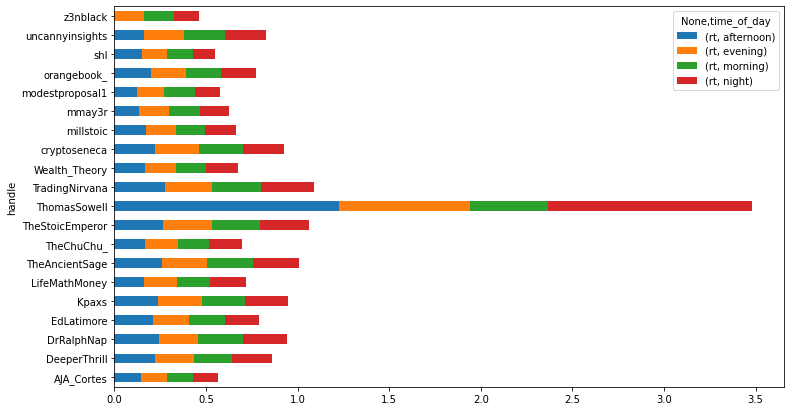

In [ ]:
rt_df.unstack().plot(kind='barh', stacked=True, figsize=(12, 7))

In [ ]:
df = pd.read_csv('tweets.csv')

`Задание 6`: 

Используя `WordNetLemmatizer()`, `nltk.word_tokenize()` и словарь положительных и отрицательных слов (`positive-words.txt`, `negative-words.txt`), а также метод `.apply()` высчитайте индекс тональности для твиттов и запишите в колонке `sentiment`.

Выделите 10% самых позитивных и 10% самых негативных твиттов с помощью 1-го и 9-го дециля

Выведите их построчно



In [ ]:
def read2list(file):
    file = open(file, 'r', encoding='latin-1')
    lines = file.readlines()
    lines = [line.rstrip('\n') for line in lines]
    file.close()
    return lines

In [ ]:
positive = read2list('positive-words.txt')

In [ ]:
negative = read2list('negative-words.txt')

In [ ]:
import nltk
from nltk import WordNetLemmatizer

def count_sentiment_score(tweet):
    score = 0
    counter = 0
    number_of_words = 0
    tweet_tokenized = nltk.word_tokenize(tweet)
    for word in tweet_tokenized:
        number_of_words += 1
        word_lemmatized = wnl.lemmatize(word)
        if word_lemmatized in positive:
            counter += 1
        if word_lemmatized in negative:
            counter -= 1
    if number_of_words != 0:
      score = counter/number_of_words
    return score

df['sentiment_score'] = df['tweet'].apply(count_sentiment_score)

In [ ]:
df['decile_rank'] = pd.qcut(df['sentiment_score'], 10, duplicates='drop')

In [ ]:
positive_tweet_df = df[df.decile_rank == df.decile_rank.max()]
negative_tweet_df = df[df.decile_rank == df.decile_rank.min()]

In [ ]:
positive_tweet = list(positive_tweet_df['tweet'])
for tweet in positive_tweet:
  print(tweet)

Выходные данные были обрезаны до нескольких последних строк (5000).

those who value respect and integrity
 We envy what we think was within our reach
 The recipe for genius is constant focused learning in the direction of curiosity
 The faster you realize you don’t need an identity, the sooner you will start growing, which will naturally lead to happiness
 Once you have solid mental foundations &amp; figured out the right life direction,

success is about patiently maintaining the flow whilst avoiding decisional suicides
 Learn to enjoy not thinking
 Most want to feel smart, not be smart

the bubble of ego popped,
healthy growth can now start
 Upon being “wronged”,
some repeat the behavior onto others,
while some others try to improve things.

The difference is called intelligence
 Not trying to look cool is cool.

Not trying to look smart is smart.

Pretend to be what you are not,
and you will never be what you could be
 The stricter the rules parents enforce,
the less creative once 

In [ ]:
negative_tweet = list(negative_tweet_df['tweet'])
for tweet in negative_tweet:
  print(tweet)

Выходные данные были обрезаны до нескольких последних строк (5000).

“Walking for 30 minutes with no specific purpose everyday?
People would think I’m crazy! I don’t want to waste my time!”

The same person is overweight and spends their time on FB/the news.

Social anxiety has a cause.
Diseases too

when it comes to your family, many bad habits are deeply ingrained.

Unless you decide to cut all ties (risking potential regrets), the opportunity cost of trying to help people who refuse to help themselves is huge
 Everything compounds through time.

Solve small issues as they arise, unless you want to deal with a monster of your own creation:

A hybrid creature shaped by bad habits.

An abomination doomed to spend its existence spitting its poison:

a mixture of ignorance, greed and anger
 When you are at the wheel of your vehicle, you don’t want to be unnecessarily distracted.

Yet, during our life journey, we tend to voluntarily surround ourselves with artifices &amp; noise.

No wonde